In [1]:
# Import Libraries
import os
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
import seaborn as sns
import earthpy as et
import earthpy.plot as ep
import scipy

In [2]:
# Working directory
work_dir = '/Users/arbailey/natcap/idb/data/work/mangroves/tandemx/'
os.chdir(work_dir)
gmf_hmax_source = os.path.join(work_dir, 'gmf_Andros_TDX_DEM_12m_EGM2008_CHM_Cal_mask.tif')
gmw2016_hmax_source = os.path.join(work_dir, 'gmw2016_Andros_TDX_DEM_12m_EGM2008_CHM_Cal_mask.tif')
wam_hmax_source = os.path.join(work_dir, 'wam_Andros_TDX_DEM_12m_EGM2008_CHM_Cal_mask.tif')
tnc_hmax_soure = os.path.join(work_dir, 'tnc_Andros_TDX_DEM_12m_EGM2008_CHM_Cal_mask.tif')

In [3]:
# Read in the max height rasters - GMF
with rio.open(gmf_hmax_source) as src:
    gmf_hmax = src.read(1, masked=True)
# GMW 2016 raster
with rio.open(gmw2016_hmax_source) as src:
    gmw2016_hmax = src.read(1, masked=True)
# WAM 
with rio.open(wam_hmax_source) as src:
    wam_hmax = src.read(1, masked=True)
# TNC
with rio.open(tnc_hmax_soure) as src:
    tnc_hmax = src.read(1, masked=True)

In [4]:
def hist_manghgt(data_np, title_text):
    sns.set(font_scale=2.5, style="whitegrid")
    fig, ax = ep.hist(data_np, 
        bins = np.arange(16), # [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
        colors=['brown'],
        title=title_text,
        xlabel='Max Canopy Height (m)',
        ylabel='Number of Pixels') 
    ax.set_xticks(range(0,16,2))
    return (fig, ax)

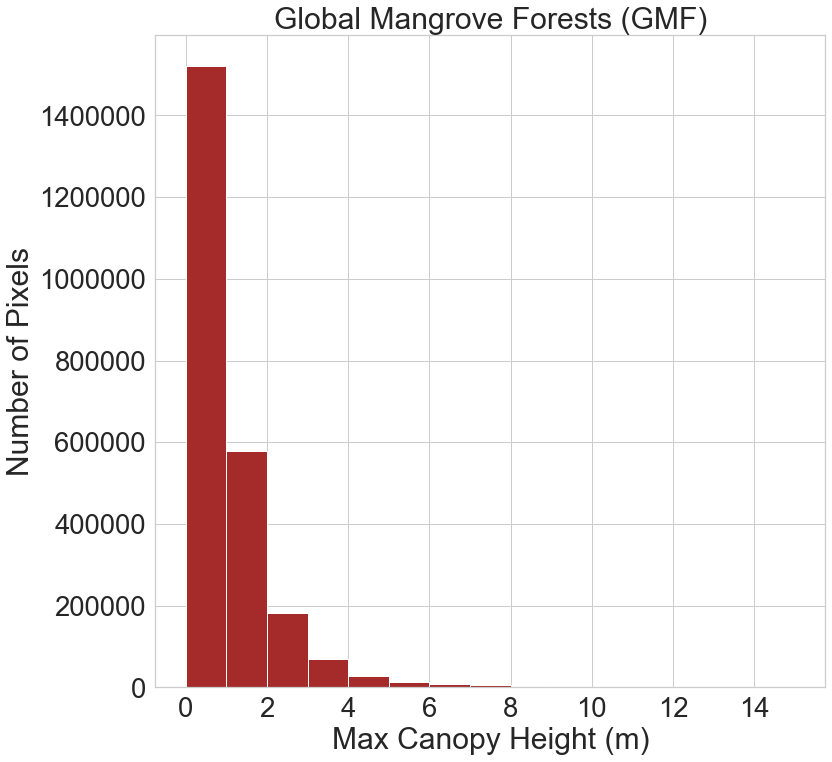

In [5]:
gmf_hmax_hist = hist_manghgt(gmf_hmax, 'Global Mangrove Forests (GMF)')

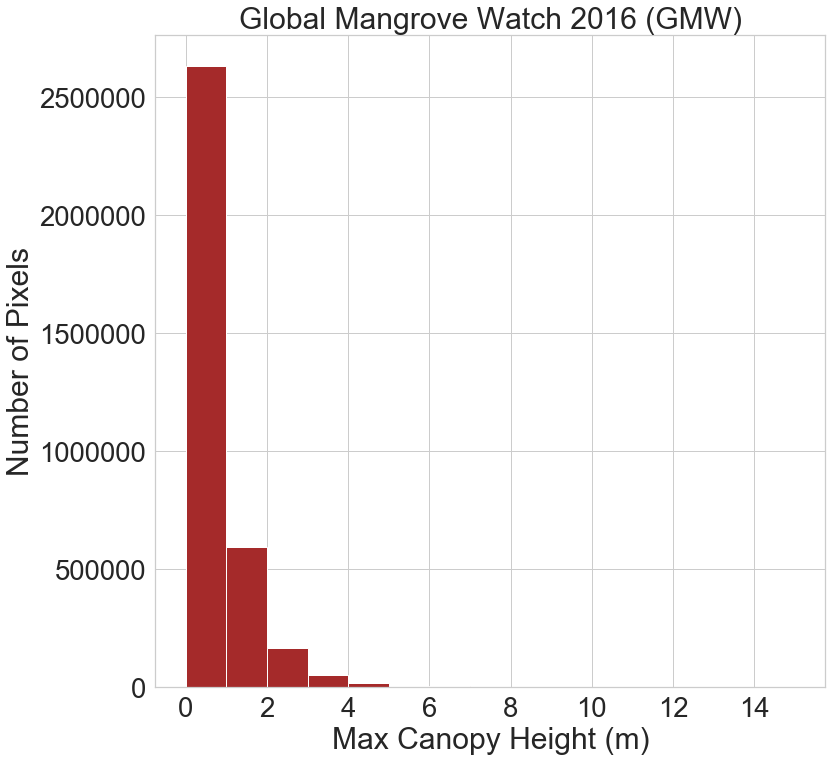

In [6]:
gmw2016_hmax_hist = hist_manghgt(gmw2016_hmax, 'Global Mangrove Watch 2016 (GMW)')

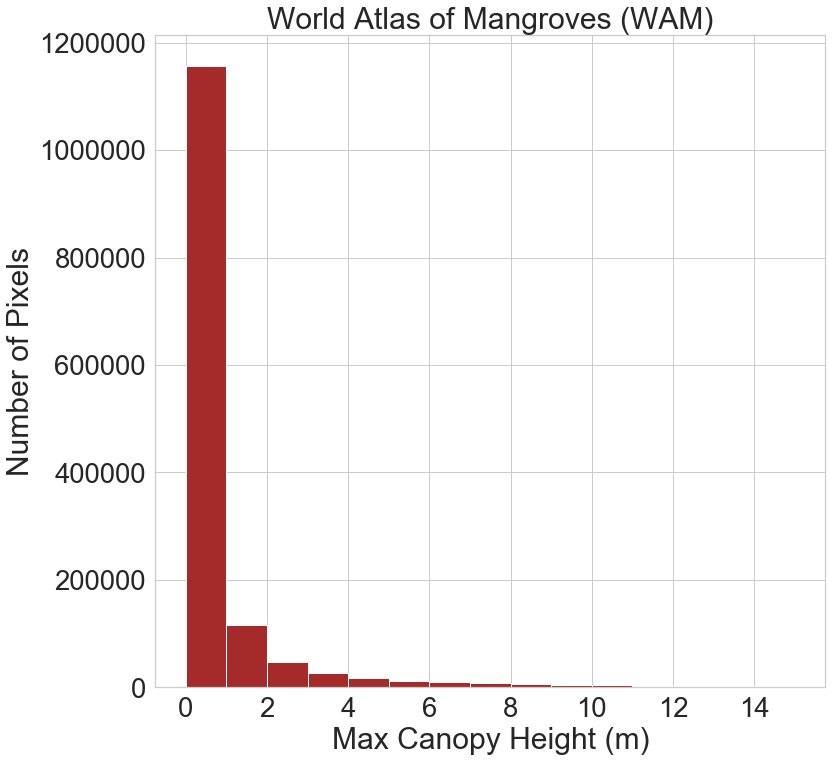

In [7]:
wam_hmax_hist = hist_manghgt(wam_hmax, 'World Atlas of Mangroves (WAM)')

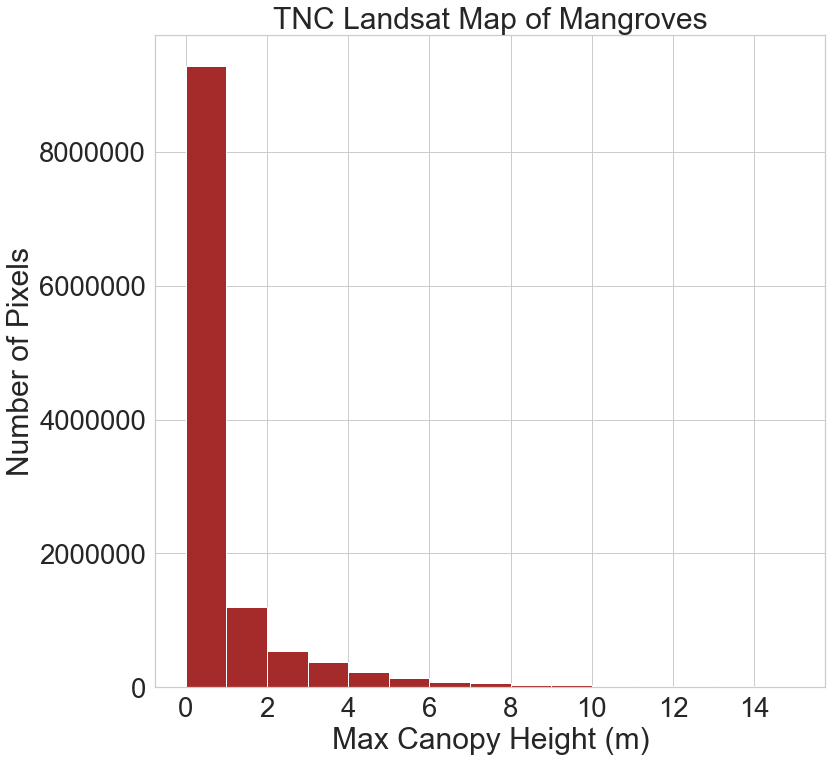

In [8]:
tnc_hmax_hist = hist_manghgt(tnc_hmax, 'TNC Landsat Map of Mangroves')

In [9]:
# See the values in each bin of the histogram
def hist_table(data):
    counts,bins = np.histogram(data, bins=np.arange(56)) # 54.3 is max value for Andros TanDEM-X canopy heights
    print("counts:", counts)
    print("bins:", bins)

In [10]:
hist_table(gmf_hmax)
print(np.min(gmf_hmax))
print(np.max(gmf_hmax))

counts: [219258177    578690    182445     68949     28039     14057      8265
      5016      3156      1882      1247       885       758       640
       510       423       288       179       105        91        90
        54        62        64        65        58        42        53
        39        37        34        35        31        34        36
        21        22        20        18        15        15         8
        13         7        10        13        10         8         6
         5         6         8         6         3         3]
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
-31067.455
81.80176


In [11]:
hist_table(gmw2016_hmax)
print(np.min(gmw2016_hmax))
print(np.max(gmw2016_hmax))

counts: [484141982    594435    164734     52962     18161      7467      3796
      2141      1213       722       503       357       294       236
       208       176       171       127       136       130       127
       100        74        93        62        67        61        69
        51        40        26        27        21        20        33
        18        19        20        10         6        13         9
        13         9        12         8         9        10         5
        13         8        12         3         3         9]
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
-31068.383
99.76399


In [12]:
hist_table(wam_hmax)
print(np.min(wam_hmax))
print(np.max(wam_hmax))

counts: [484854268    115554     47805     27164     17591     12087      9213
      7220      5625      4494      3700      3047      2664      2152
      1970      1755      1528      1218      1095       875       770
       665       587       531       467       401       400       335
       258       244       183       178       152       149       126
       118       108        81        75        63        77        57
        74        41        33        36        40        41        39
        32        21        23        19        25        17]
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
-31067.855
109.62559


In [13]:
hist_table(tnc_hmax)
print(np.min(tnc_hmax))
print(np.max(tnc_hmax))

counts: [165915463   1197473    535254    372280    226713    136437     85859
     58421     40695     29239     22147     17733     14908     12871
     11431     10505      9023      7967      6891      6298      5629
      4825      4238      4066      3494      2976      2796      2477
      2216      1962      1735      1592      1416      1295      1077
      1004       901       808       753       586       515       486
       427       344       308       283       264       231       202
       191       150       167       153       143       151]
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
-31068.943
100.80829


In [14]:
gmf_hmax

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=0.0,
  dtype=float32)

In [15]:
gmf_hmax.count()

2927258

In [16]:
np.ma.count_masked(gmf_hmax)

217737263

In [17]:
gmw2016_hmax.count()

4535710

In [18]:
wam_hmax.count()

2347593

In [19]:
tnc_hmax.count()

17900022